In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#%matplotlib notebook
%matplotlib inline

In [3]:
import os
cwd = os.getcwd()

NOTEBOOK_DIR = os.path.dirname(cwd)
ROOT = os.path.dirname(os.path.dirname(os.path.dirname(NOTEBOOK_DIR)))

FIGURES_DIR = os.path.join(ROOT, 'figures/abc_parameterizations/training/mnist')
# CONFIG_PATH = os.path.join(ROOT, 'pytorch/configs/abc_parameterizations/fc_abc.yaml')

In [4]:
import sys
sys.path.append(ROOT)

In [12]:
import torch
import pickle

from utils.plot.abc_parameterizations.results import *



from utils.tools import load_pickle

from utils.tools import read_yaml, set_random_seeds
from utils.plot.abc_parameterizations.initializations import *
from utils.plot.abc_parameterizations.one_d_functions import *
from pytorch.configs.base import BaseConfig
from pytorch.configs.model import ModelConfig
from pytorch.models.abc_params.fully_connected import ip, muP, ipllr
from pytorch.models.abc_params.fully_connected.standard_fc_ip import StandardFCIP

## Set variables

In [10]:
L = 6
WIDTH = 1024
BASE_LR = 0.01
ACTIVATION = "relu"
BATCH_SIZE = 512
BIAS = False
N_TRIALS = 5


experiments_dir = os.path.join(ROOT, 'experiments')
base_experiment = 'standard_fc_ip_mnist'

In [13]:
results = get_trial_results([L], [WIDTH], N_TRIALS, experiments_dir, base_experiment, ACTIVATION, BASE_LR, 
                            BATCH_SIZE, BIAS)

/Users/karlhajjar/Documents/projects/wide-networks/experiments/standard_fc_ip_mnist/L=6_m=1024/activation=relu_lr=0.01_batchsize=512_bias=False/trial_1/results.pickle
/Users/karlhajjar/Documents/projects/wide-networks/experiments/standard_fc_ip_mnist/L=6_m=1024/activation=relu_lr=0.01_batchsize=512_bias=False/trial_2/results.pickle
/Users/karlhajjar/Documents/projects/wide-networks/experiments/standard_fc_ip_mnist/L=6_m=1024/activation=relu_lr=0.01_batchsize=512_bias=False/trial_3/results.pickle
/Users/karlhajjar/Documents/projects/wide-networks/experiments/standard_fc_ip_mnist/L=6_m=1024/activation=relu_lr=0.01_batchsize=512_bias=False/trial_4/results.pickle
/Users/karlhajjar/Documents/projects/wide-networks/experiments/standard_fc_ip_mnist/L=6_m=1024/activation=relu_lr=0.01_batchsize=512_bias=False/trial_5/results.pickle


In [19]:
epoch_res, step_res = get_epoch_step_results_from_trials(results, pop_keys=('lrs', 'all_outputs', 'all_losses'))

In [20]:
epoch_res[L][WIDTH][0].keys()

dict_keys(['training', 'validation', 'test'])

In [22]:
len(step_res[L][WIDTH])

5

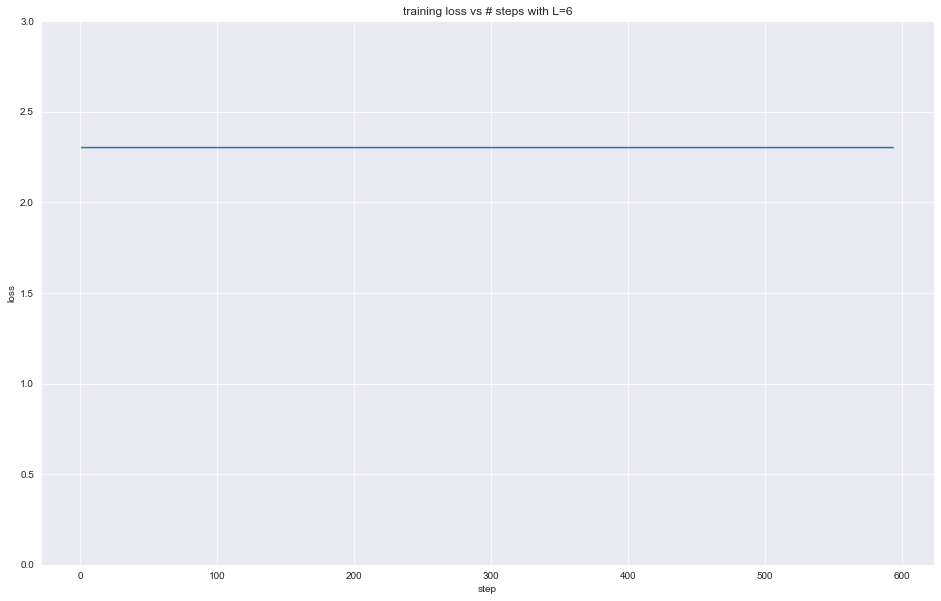

In [34]:
plot_metric_vs_time(L, step_res[L][WIDTH][1], metric='all_losses', metric_name='loss', time='step', save_path=None,
                    mode='training', marker='.', y_min=0, y_max=3, show=True, save=False)

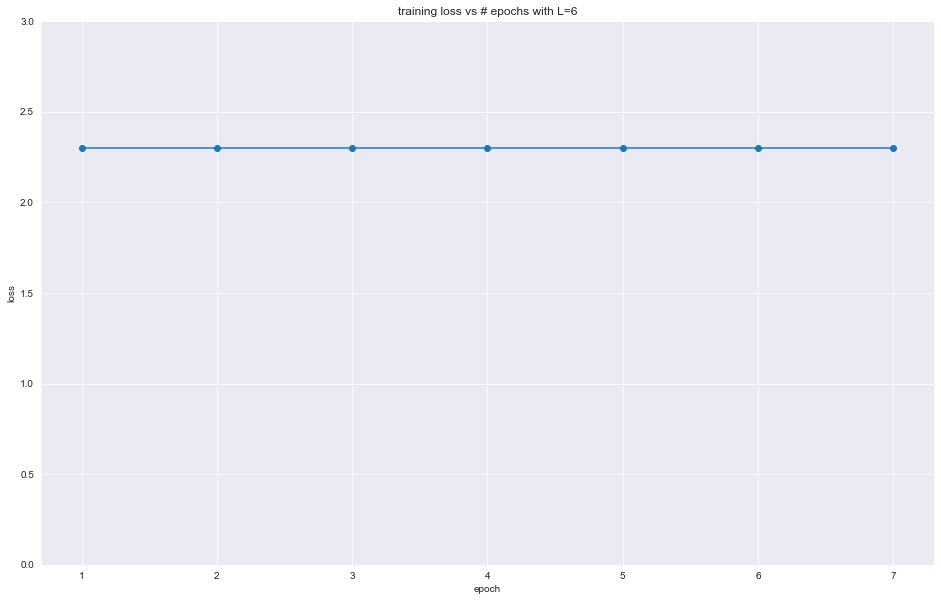

In [32]:
plot_metric_vs_time(L, epoch_res[L][WIDTH][0], metric='loss', time='epoch', save_path=None, mode='training', 
                    marker='o', y_min=0, y_max=3, show=True, save=False)

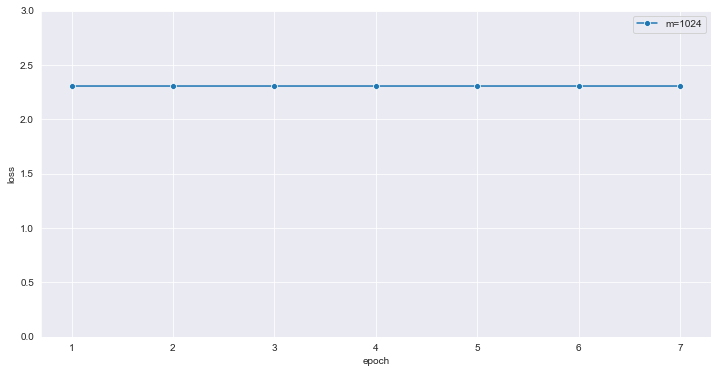

In [38]:
plt.figure(figsize=(12,6))
plt.ylim(0, 3)
plot_metric_vs_time_std(WIDTH, epoch_res[L][WIDTH], metric='loss', time='epoch', mode='training', marker='o')
plt.show()

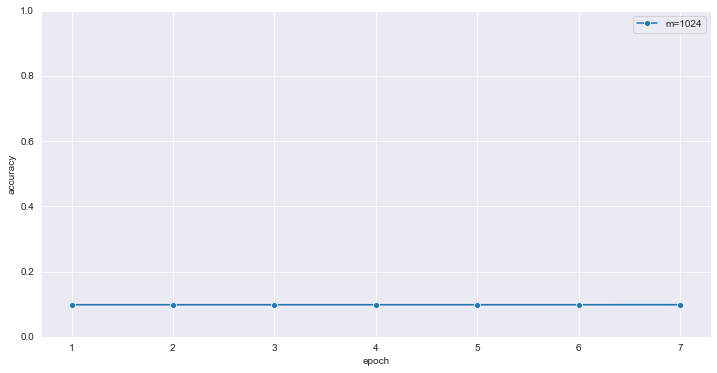

In [40]:
plt.figure(figsize=(12,6))
plt.ylim(0, 1)
plot_metric_vs_time_std(WIDTH, epoch_res[L][WIDTH], metric='accuracy', time='epoch', mode='training', marker='o')
plt.show()